<a href="https://colab.research.google.com/github/tainguyen30/AI/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Making prediction for FPT, MSN, PNJ, VIC Stock price in 2 months based on dataset by building LSTM model

***PART 1: IMPORT NECESSARY LIBRARIES***

In [3]:
# First we will import the necessary Libraries
import pandas as pd
import numpy as np
import math

# For PLotting
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import r2_score  # compatibility
from sklearn.metrics import mean_absolute_error   # average absolute error
from sklearn.metrics import mean_absolute_percentage_error  # average percentage absolute error
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
from keras.models import Sequential   # input
from keras.layers import Dense        # output
from keras.layers import Dropout      # Avoid overfitting
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint   # Best train

***PART 2: READ DATA, READ INFO & RETURN DESCRIPTION OF DATAFRAME***

In [4]:
# From CSV file
# FPT 25/12/2018 9:15 - 22/12/2020 14:46 (1)
df1 = pd.read_csv("/content/FPT.csv")
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])
df1.set_index('Date/Time', inplace=True)
print('Total time steps present in the FPT dataset: ',df1.shape[0])
print('Total number of fields present in the FPT dataset:',df1.shape[1])
df1.shape

# MSN 25/12/2017 9:15 - 22/12/2020 14:46 (2)
df2 = pd.read_csv("/content/MSN.csv")
df2['Date/Time'] = pd.to_datetime(df2['Date/Time'])
df2.set_index('Date/Time', inplace=True)
print('Total time steps present in the MSN dataset: ',df2.shape[0])
print('Total number of fields present in the MSN dataset: ',df2.shape[1])
df2.shape

# PNJ 28/2/2018 9:15 - 22/12/2020 14:46 (3)
df3 = pd.read_csv("/content/PNJ.csv")
df3['Date/Time'] = pd.to_datetime(df3['Date/Time'])
df3.set_index('Date/Time', inplace=True)
print('Total time steps present in the MSN dataset: ',df3.shape[0])
print('Total number of fields present in the MSN dataset: ',df3.shape[1])
df3.shape

# VIC 17/10/2018 9:39 - 22/12/2020 14:46 (4)
df4 = pd.read_csv("/content/VIC.csv")
df4['Date/Time'] = pd.to_datetime(df4['Date/Time'])
df4.set_index('Date/Time', inplace=True)
print('Total time steps present in the MSN dataset: ',df4.shape[0])
print('Total number of fields present in the MSN dataset: ',df4.shape[1])
df4.shape

Total time steps present in the FPT dataset:  97406
Total number of fields present in the FPT dataset: 7
Total time steps present in the MSN dataset:  135354
Total number of fields present in the MSN dataset:  7
Total time steps present in the MSN dataset:  125309
Total number of fields present in the MSN dataset:  7
Total time steps present in the MSN dataset:  101266
Total number of fields present in the MSN dataset:  7


(101266, 7)

In [ ]:
# First - Last 5 lines
df1.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df1.tail()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2020-12-22 14:24:00,FPT,58.2,58.2,58.2,58.2,27470,0
2020-12-22 14:25:00,FPT,58.2,58.2,58.2,58.2,14820,0
2020-12-22 14:26:00,FPT,58.2,58.2,58.2,58.2,500,0
2020-12-22 14:29:00,FPT,58.1,58.1,58.1,58.1,2500,0
2020-12-22 14:46:00,FPT,58.1,58.1,58.1,58.1,11170,0


In [ ]:
df2.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2017-12-25 09:15:00,MSN,73.1,73.1,73.1,73.1,4210,0
2017-12-25 09:16:00,MSN,73.0,73.0,73.0,73.0,5000,0
2017-12-25 09:18:00,MSN,73.5,73.5,73.5,73.5,210,0
2017-12-25 09:20:00,MSN,73.2,73.5,73.1,73.1,2050,0
2017-12-25 09:21:00,MSN,73.0,73.0,73.0,73.0,1380,0


In [ ]:
df2.tail()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2020-12-22 14:23:00,MSN,82.8,82.8,82.8,82.8,700,0
2020-12-22 14:24:00,MSN,82.7,82.8,82.7,82.8,4660,0
2020-12-22 14:25:00,MSN,82.8,82.8,82.8,82.8,50,0
2020-12-22 14:27:00,MSN,82.8,82.8,82.8,82.8,300,0
2020-12-22 14:46:00,MSN,82.8,82.8,82.8,82.8,200,0


In [ ]:
df3.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-02-28 09:15:00,PNJ,78.14,78.99,78.14,78.99,270,0
2018-02-28 09:16:00,PNJ,78.94,78.94,78.94,78.94,10,0
2018-02-28 09:19:00,PNJ,78.14,78.14,78.14,78.14,283,0
2018-02-28 09:20:00,PNJ,78.14,78.14,78.14,78.14,480,0
2018-02-28 09:21:00,PNJ,78.14,78.14,78.14,78.14,146,0


In [ ]:
df3.tail()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2020-12-22 14:22:00,PNJ,78.2,78.2,78.2,78.2,5000,0
2020-12-22 14:23:00,PNJ,78.2,78.2,78.2,78.2,1700,0
2020-12-22 14:24:00,PNJ,78.2,78.2,78.2,78.2,870,0
2020-12-22 14:25:00,PNJ,78.1,78.1,78.1,78.1,13000,0
2020-12-22 14:46:00,PNJ,78.3,78.3,78.3,78.3,1500,0


In [ ]:
df4.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-10-17 09:39:00,VIC,98.5,98.5,98.5,98.5,390,0
2018-10-17 09:40:00,VIC,98.5,98.5,98.5,98.5,760,0
2018-10-17 09:41:00,VIC,98.6,98.6,98.6,98.6,2060,0
2018-10-17 09:42:00,VIC,98.6,98.6,98.6,98.6,5540,0
2018-10-17 09:43:00,VIC,98.6,98.7,98.6,98.7,760,0


In [ ]:
df4.tail()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2020-12-22 14:22:00,VIC,105.8,105.8,105.7,105.7,1870,0
2020-12-22 14:23:00,VIC,105.7,105.7,105.7,105.7,2510,0
2020-12-22 14:24:00,VIC,105.7,105.7,105.7,105.7,3620,0
2020-12-22 14:25:00,VIC,105.7,105.7,105.7,105.7,100,0
2020-12-22 14:46:00,VIC,105.7,105.7,105.7,105.7,90,0


In [ ]:
# Print info about Dataframe
# Number of column, column labels, number of cells in each column (non-null values), column data types, memory usage

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Open           97406 non-null  float64
 2   High           97406 non-null  float64
 3   Low            97406 non-null  float64
 4   Close          97406 non-null  float64
 5   Volume         97406 non-null  int64  
 6   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135354 entries, 2017-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Open           135354 non-null  float64
 2   High           135354 non-null  float64
 3   Low            135354 non-null  float64
 4   Close          135354 non-null  float64
 5   Volume         135354 non-null  int64  
 6   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125309 entries, 2018-02-28 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Open           125309 non-null  float64
 2   High           125309 non-null  float64
 3   Low            125309 non-null  float64
 4   Close          125309 non-null  float64
 5   Volume         125309 non-null  int64  
 6   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101266 entries, 2018-10-17 09:39:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Open           101266 non-null  float64
 2   High           101266 non-null  float64
 3   Low            101266 non-null  float64
 4   Close          101266 non-null  float64
 5   Volume         101266 non-null  int64  
 6   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 6.2+ MB


In [ ]:
# Numeric data
# count: the number of not-empty values
# mean: the average value
# std: standard deviation
# min: minimum value
# max: maximum value
# 25%/50%/75%: 25%/50%/75% percentile

In [ ]:
df1.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [ ]:
df3.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [ ]:
df4.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [ ]:
# Checking null values
print('Null Values 1:',df1.isnull().values.sum())
print('NA values 1:',df1.isnull().values.any())
print('Null Values 2:',df2.isnull().values.sum())
print('NA values 2:',df2.isnull().values.any())
print('Null Values 3:',df3.isnull().values.sum())
print('NA values 3:',df3.isnull().values.any())
print('Null Values 4:',df4.isnull().values.sum())
print('NA values 4:',df4.isnull().values.any())

Null Values 1: 0
NA values 1: False
Null Values 2: 0
NA values 2: False
Null Values 3: 0
NA values 3: False
Null Values 4: 0
NA values 4: False


***PART 3: VISUALIZATION***

In [ ]:
print(df1.columns)

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest'], dtype='object')


In [ ]:
# Graph between Open price & Close price

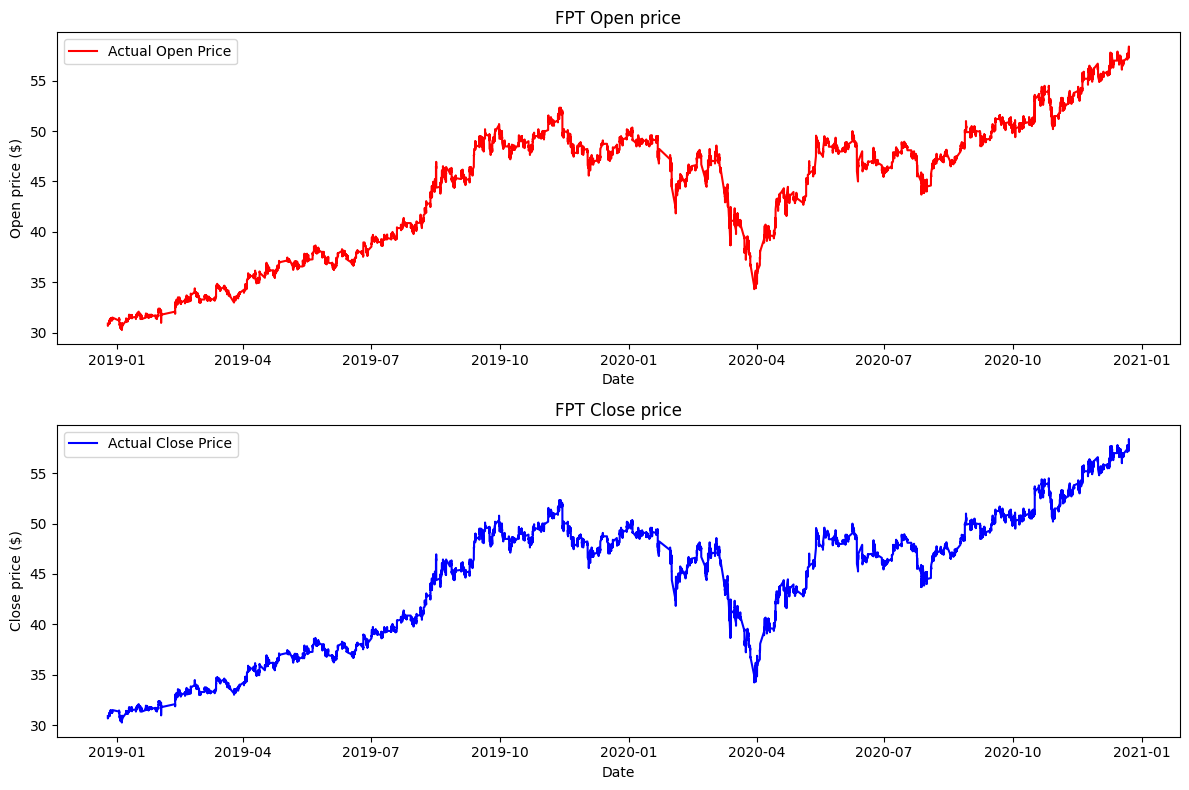

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# First subplot
ax1.set_title("FPT Open price")
ax1.plot(df1["Open"], label="Actual Open Price", color="red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Open price ($)")
ax1.legend()

# Second subplot
ax2.set_title("FPT Close price")
ax2.plot(df1["Close"], label="Actual Close Price", color="blue")
ax2.set_xlabel("Date")
ax2.set_ylabel("Close price ($)")
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

***PART 4: CREATE DATASETS, SCALE & RESHAPE DATA***

In [ ]:
# Create a new dataframe with only "Close" column, covert to a numpy array & scale the data

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))

In [6]:
def training_data_len(dataset):
    training_data_len = math.ceil(len(dataset)*0.8)
    return training_data_len

In [7]:
def scale_data(dataset):
    scaled_data = scaler.fit_transform(dataset)
    return scaled_data

In [ ]:
data1 = df1.filter(["Close"])
dataset1 = data1.values

training_data_len_1 = training_data_len(dataset1)
print("FPT:",training_data_len_1)

scale_data(dataset1)

FPT: 77925


array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

In [8]:
data2 = df2.filter(["Close"])
dataset2 = data2.values

# (97406)
training_data_len_2 = training_data_len(dataset2)
print("MSN:",training_data_len_2)

scale_data(dataset2)


MSN: 108284


array([[0.37290503],
       [0.37150838],
       [0.37849162],
       ...,
       [0.50837989],
       [0.50837989],
       [0.50837989]])

In [26]:
data3 = df3.filter(["Close"])
dataset3 = data3.values

# (97406)
training_data_len_3 = training_data_len(dataset3)
print("PNJ:",training_data_len_3)

scale_data(dataset3)

PNJ: 100248


array([[0.62209925],
       [0.62120671],
       [0.6069261 ],
       ...,
       [0.60799714],
       [0.60621207],
       [0.60978222]])

In [ ]:
data4 = df4.filter(["Close"])
dataset4 = data4.values

# (97406)
training_data_len_4 = training_data_len(dataset4)
print("VIC:",training_data_len_4)

scale_data(dataset4)

VIC: 81013


array([[0.52136752],
       [0.52136752],
       [0.52307692],
       ...,
       [0.64444444],
       [0.64444444],
       [0.64444444]])

In [ ]:
# Create a training dataset & split the data

In [9]:
def data_train(train_data):
    x_train = []
    y_train = []
    for i in range (60, len(train_data)):
        x_train.append(train_data[i-60:i, 0]) # 0 - 59
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print(x_train.shape)

    return x_train, y_train


In [ ]:
train_data_1 = scale_data(dataset3[0:training_data_len_1 , :])
x_train_1, y_train_1 = data_train(train_data_1)
print(x_train_1)
print(y_train_1)

(77865, 60, 1)
[[[0.54793936]
  [0.54687166]
  [0.5297886 ]
  ...
  [0.53469998]
  [0.5398249 ]
  [0.5398249 ]]

 [[0.54687166]
  [0.5297886 ]
  [0.5297886 ]
  ...
  [0.5398249 ]
  [0.5398249 ]
  [0.5398249 ]]

 [[0.5297886 ]
  [0.5297886 ]
  [0.5297886 ]
  ...
  [0.5398249 ]
  [0.5398249 ]
  [0.5398249 ]]

 ...

 [[0.66901559]
  [0.66901559]
  [0.66901559]
  ...
  [0.69762972]
  [0.69549434]
  [0.65428144]]

 [[0.66901559]
  [0.66901559]
  [0.66901559]
  ...
  [0.69549434]
  [0.65428144]
  [0.65214606]]

 [[0.66901559]
  [0.66901559]
  [0.6668802 ]
  ...
  [0.65428144]
  [0.65214606]
  [0.64808883]]]
[0.5398249  0.5398249  0.5398249  ... 0.65214606 0.64808883 0.64381807]


In [10]:
train_data_2 = scale_data(dataset2[0:training_data_len_2 , :])
x_train_2, y_train_2 = data_train(train_data_2)
print(x_train_2)
print(y_train_2)

(108224, 60, 1)
[[[0.37290503]
  [0.37150838]
  [0.37849162]
  ...
  [0.38268156]
  [0.38128492]
  [0.38128492]]

 [[0.37150838]
  [0.37849162]
  [0.37290503]
  ...
  [0.38128492]
  [0.38128492]
  [0.38407821]]

 [[0.37849162]
  [0.37290503]
  [0.37150838]
  ...
  [0.38128492]
  [0.38407821]
  [0.38128492]]

 ...

 [[0.16620112]
  [0.16480447]
  [0.16620112]
  ...
  [0.16201117]
  [0.16340782]
  [0.16201117]]

 [[0.16480447]
  [0.16620112]
  [0.16480447]
  ...
  [0.16340782]
  [0.16201117]
  [0.16340782]]

 [[0.16620112]
  [0.16480447]
  [0.16620112]
  ...
  [0.16201117]
  [0.16340782]
  [0.16340782]]]
[0.38407821 0.38128492 0.38128492 ... 0.16340782 0.16340782 0.16201117]


In [27]:
train_data_3 = scale_data(dataset3[0:training_data_len_3 , :])
x_train_3, y_train_3 = data_train(train_data_3)
print(x_train_3)
print(y_train_3)

(100188, 60, 1)
[[[0.62209925]
  [0.62120671]
  [0.6069261 ]
  ...
  [0.61103177]
  [0.61531596]
  [0.61531596]]

 [[0.62120671]
  [0.6069261 ]
  [0.6069261 ]
  ...
  [0.61531596]
  [0.61531596]
  [0.61531596]]

 [[0.6069261 ]
  [0.6069261 ]
  [0.6069261 ]
  ...
  [0.61531596]
  [0.61531596]
  [0.61531596]]

 ...

 [[0.26883256]
  [0.26704748]
  [0.26704748]
  ...
  [0.26526241]
  [0.26526241]
  [0.26526241]]

 [[0.26704748]
  [0.26704748]
  [0.26704748]
  ...
  [0.26526241]
  [0.26526241]
  [0.26526241]]

 [[0.26704748]
  [0.26704748]
  [0.26704748]
  ...
  [0.26526241]
  [0.26526241]
  [0.26704748]]]
[0.61531596 0.61531596 0.61531596 ... 0.26526241 0.26704748 0.26526241]


In [ ]:
train_data_4 = scale_data(dataset4[0:training_data_len_4 , :])
x_train_4, y_train_4 = data_train(train_data_4)
print(x_train_4)
print(y_train_4)

(80953, 60, 1)
[[[0.52136752]
  [0.52136752]
  [0.52307692]
  ...
  [0.52307692]
  [0.52307692]
  [0.52478632]]

 [[0.52136752]
  [0.52307692]
  [0.52307692]
  ...
  [0.52307692]
  [0.52478632]
  [0.52478632]]

 [[0.52307692]
  [0.52307692]
  [0.52478632]
  ...
  [0.52478632]
  [0.52478632]
  [0.52478632]]

 ...

 [[0.2957265 ]
  [0.2957265 ]
  [0.2957265 ]
  ...
  [0.31965812]
  [0.31965812]
  [0.32478632]]

 [[0.2957265 ]
  [0.2957265 ]
  [0.2974359 ]
  ...
  [0.31965812]
  [0.32478632]
  [0.32478632]]

 [[0.2957265 ]
  [0.2974359 ]
  [0.2957265 ]
  ...
  [0.32478632]
  [0.32478632]
  [0.32478632]]]
[0.52478632 0.52478632 0.52307692 ... 0.32478632 0.32478632 0.32136752]


***PART 5: BUILD LSTM MODEL***

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(60,1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
data_train_1 = model.fit(x_train_1, y_train_1, batch_size=32, epochs=100)

Epoch 1/100
2434/2434 [==============================] - 155s 62ms/step - loss: 5.1747e-04
Epoch 2/100
2434/2434 [==============================] - 143s 59ms/step - loss: 2.4948e-05
Epoch 3/100
2434/2434 [==============================] - 142s 58ms/step - loss: 2.0796e-05
Epoch 4/100
2434/2434 [==============================] - 139s 57ms/step - loss: 1.5143e-05
Epoch 5/100
2434/2434 [==============================] - 140s 58ms/step - loss: 1.1524e-05
Epoch 6/100
2434/2434 [==============================] - 141s 58ms/step - loss: 9.6338e-06
Epoch 7/100
2434/2434 [==============================] - 141s 58ms/step - loss: 8.8139e-06
Epoch 8/100
2434/2434 [==============================] - 142s 58ms/step - loss: 8.6021e-06
Epoch 9/100
2434/2434 [==============================] - 142s 58ms/step - loss: 8.0394e-06
Epoch 10/100
2434/2434 [==============================] - 141s 58ms/step - loss: 8.6005e-06
Epoch 11/100
2434/2434 [==============================] - 140s 58ms/step - loss: 7.4329e-

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Data/FPT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
data_train_2 = model.fit(x_train_2, y_train_2, batch_size=32, epochs=100)

Epoch 1/100
3382/3382 [==============================] - 99s 29ms/step - loss: 2.5207e-04
Epoch 2/100
3382/3382 [==============================] - 96s 28ms/step - loss: 2.5745e-05
Epoch 3/100
3382/3382 [==============================] - 95s 28ms/step - loss: 1.8265e-05
Epoch 4/100
3382/3382 [==============================] - 95s 28ms/step - loss: 1.3854e-05
Epoch 5/100
3382/3382 [==============================] - 95s 28ms/step - loss: 1.2468e-05
Epoch 6/100
3382/3382 [==============================] - 94s 28ms/step - loss: 1.1633e-05
Epoch 7/100
3382/3382 [==============================] - 94s 28ms/step - loss: 1.1419e-05
Epoch 8/100
3382/3382 [==============================] - 100s 29ms/step - loss: 1.1055e-05
Epoch 9/100
3382/3382 [==============================] - 108s 32ms/step - loss: 1.0974e-05
Epoch 10/100
3382/3382 [==============================] - 97s 29ms/step - loss: 1.0828e-05
Epoch 11/100
3382/3382 [==============================] - 95s 28ms/step - loss: 1.0399e-05
Epoch 

In [16]:
model.save("/content/drive/MyDrive/Colab Notebooks/MSN.h5")

In [ ]:
data_train_3 = model.fit(x_train_3, y_train_3, batch_size=32, epochs=100)

Epoch 1/100
3131/3131 [==============================] - 266s 83ms/step - loss: 5.5623e-04
Epoch 2/100
3131/3131 [==============================] - 252s 80ms/step - loss: 1.5487e-04
Epoch 3/100
3131/3131 [==============================] - 251s 80ms/step - loss: 1.4716e-04
Epoch 4/100
3131/3131 [==============================] - 257s 82ms/step - loss: 1.3982e-04
Epoch 5/100
3131/3131 [==============================] - 250s 80ms/step - loss: 1.3690e-04
Epoch 6/100
3131/3131 [==============================] - 254s 81ms/step - loss: 1.3553e-04
Epoch 7/100
3131/3131 [==============================] - 253s 81ms/step - loss: 1.3401e-04
Epoch 8/100
3131/3131 [==============================] - 256s 82ms/step - loss: 1.3450e-04
Epoch 9/100
3131/3131 [==============================] - 250s 80ms/step - loss: 1.3216e-04
Epoch 10/100
3131/3131 [==============================] - 267s 85ms/step - loss: 1.3168e-04
Epoch 11/100
3131/3131 [==============================] - 254s 81ms/step - loss: 1.3137e-

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Data/PNJ.h5")

In [ ]:
data_train_4 = model.fit(x_train_4, y_train_4, batch_size=32, epochs=100)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Data/VIC.h5")

In [ ]:
# Create the testing dataset

In [11]:
def data_test(dataset, training_data_len, test_data):
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range (60, len(test_data)):
        x_test.append(test_data[i-60:i, 0]) # 0 - 59
    x_test = np.array(x_test)
d
    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    print(x_test.shape)

    return x_test, y_test

In [ ]:
test_data_1 = scale_data(dataset1[training_data_len_1 - 60: , :])
x_test_1, y_test_1 = data_test(dataset1, training_data_len_1, test_data_1)
print(x_test_1)
print(y_test_1)

(19481, 60, 1)
[[[0.1092437 ]
  [0.11344538]
  [0.1092437 ]
  ...
  [0.12605042]
  [0.12605042]
  [0.13445378]]

 [[0.11344538]
  [0.1092437 ]
  [0.1092437 ]
  ...
  [0.12605042]
  [0.13445378]
  [0.13445378]]

 [[0.1092437 ]
  [0.1092437 ]
  [0.11344538]
  ...
  [0.13445378]
  [0.13445378]
  [0.13445378]]

 ...

 [[0.93277311]
  [0.93277311]
  [0.92436975]
  ...
  [0.98319328]
  [0.98319328]
  [0.98319328]]

 [[0.93277311]
  [0.92436975]
  [0.93277311]
  ...
  [0.98319328]
  [0.98319328]
  [0.98319328]]

 [[0.92436975]
  [0.93277311]
  [0.92436975]
  ...
  [0.98319328]
  [0.98319328]
  [0.97478992]]]
[[48.1]
 [48.1]
 [48.1]
 ...
 [58.2]
 [58.1]
 [58.1]]


In [12]:
test_data_2 = scale_data(dataset2[training_data_len_2 - 60: , :])
x_test_2, y_test_2 = data_test(dataset2, training_data_len_2, test_data_2)
print(x_test_2)
print(y_test_2)

(27070, 60, 1)
[[[0.19294606]
  [0.19502075]
  [0.19502075]
  ...
  [0.19087137]
  [0.19087137]
  [0.18879668]]

 [[0.19502075]
  [0.19502075]
  [0.19502075]
  ...
  [0.19087137]
  [0.18879668]
  [0.18879668]]

 [[0.19502075]
  [0.19502075]
  [0.19294606]
  ...
  [0.18879668]
  [0.18879668]
  [0.18879668]]

 ...

 [[0.70539419]
  [0.70539419]
  [0.7033195 ]
  ...
  [0.7033195 ]
  [0.7033195 ]
  [0.7033195 ]]

 [[0.70539419]
  [0.7033195 ]
  [0.7033195 ]
  ...
  [0.7033195 ]
  [0.7033195 ]
  [0.7033195 ]]

 [[0.7033195 ]
  [0.7033195 ]
  [0.7033195 ]
  ...
  [0.7033195 ]
  [0.7033195 ]
  [0.7033195 ]]]
[[58. ]
 [58. ]
 [57.9]
 ...
 [82.8]
 [82.8]
 [82.8]]


In [ ]:
test_data_3 = scale_data(dataset3[training_data_len_3 - 60: , :])
x_test_3, y_test_3 = data_test(dataset1, training_data_len_3, test_data_3)
print(x_test_3)
print(y_test_3)

In [ ]:
test_data_4 = scale_data(dataset4[training_data_len_4 - 60: , :])
x_test_4, y_test_4 = data_test(dataset4, training_data_len_4, test_data_4)
print(x_test_4)
print(y_test_4)

***PART 6: PREDICTION & PLOT***

In [13]:
# Root mean squared error (RMSE)
def rmse(prediction, y_test):
    rmse = np.sqrt(np.mean(prediction - y_test)**2)
    return rmse

In [ ]:
prediction1 = model.predict(x_test_1)
prediction1 = scaler.inverse_transform(prediction1)
rmse(prediction1, y_test_1)

609/609 [==============================] - 13s 19ms/step


0.011009448742537306

In [18]:
from keras.models import load_model

In [20]:
model2 = load_model("/content/drive/MyDrive/Colab Notebooks/MSN.h5")
prediction2 = model2.predict(x_test_2)
prediction2 = scaler.inverse_transform(prediction2)
rmse(prediction2, y_test_2)

846/846 [==============================] - 21s 24ms/step


0.11161733518952045

In [ ]:
model3 = load_model("/content/drive/MyDrive/Colab Notebooks/PNJ.h5")
prediction3 = model.predict(x_test_3)
prediction3 = scaler.inverse_transform(prediction3)
rmse(prediction3, y_test_3)

In [ ]:
model2 = load_model("/content/drive/MyDrive/Colab Notebooks/VIC.h5")
prediction4 = model.predict(x_test_4)
prediction4 = scaler.inverse_transform(prediction4)
rmse(prediction4, y_test_4)

In [ ]:
# Plot the data

In [21]:
def plot(data, training_data_len, prediction):
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid["Prediction"] = prediction

    print(valid)
    # Visualize
    plt.figure(figsize=(16,8))
    plt.title("Model Prediction vs Actual Data")
    plt.xlabel("Date", fontsize=15)
    plt.ylabel("Close Price ($)", fontsize=15)

    plt.plot(train["Close"])
    plt.plot(valid["Close"], color = "green")
    plt.plot(valid["Prediction"], color = "red")

    plt.legend(["Train", "Valid", "Prediction"])
    plt.show()

<ipython-input-117-b04c939acaa4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = prediction


                     Close  Prediction
Date/Time                             
2020-08-14 09:34:00  48.10   48.081669
2020-08-14 09:35:00  48.10   48.097790
2020-08-14 09:36:00  48.10   48.100864
2020-08-14 09:37:00  48.15   48.100342
2020-08-14 09:38:00  48.15   48.139790
...                    ...         ...
2020-12-22 14:24:00  58.20   58.106216
2020-12-22 14:25:00  58.20   58.131344
2020-12-22 14:26:00  58.20   58.140850
2020-12-22 14:29:00  58.10   58.146767
2020-12-22 14:46:00  58.10   58.102978

[19481 rows x 2 columns]


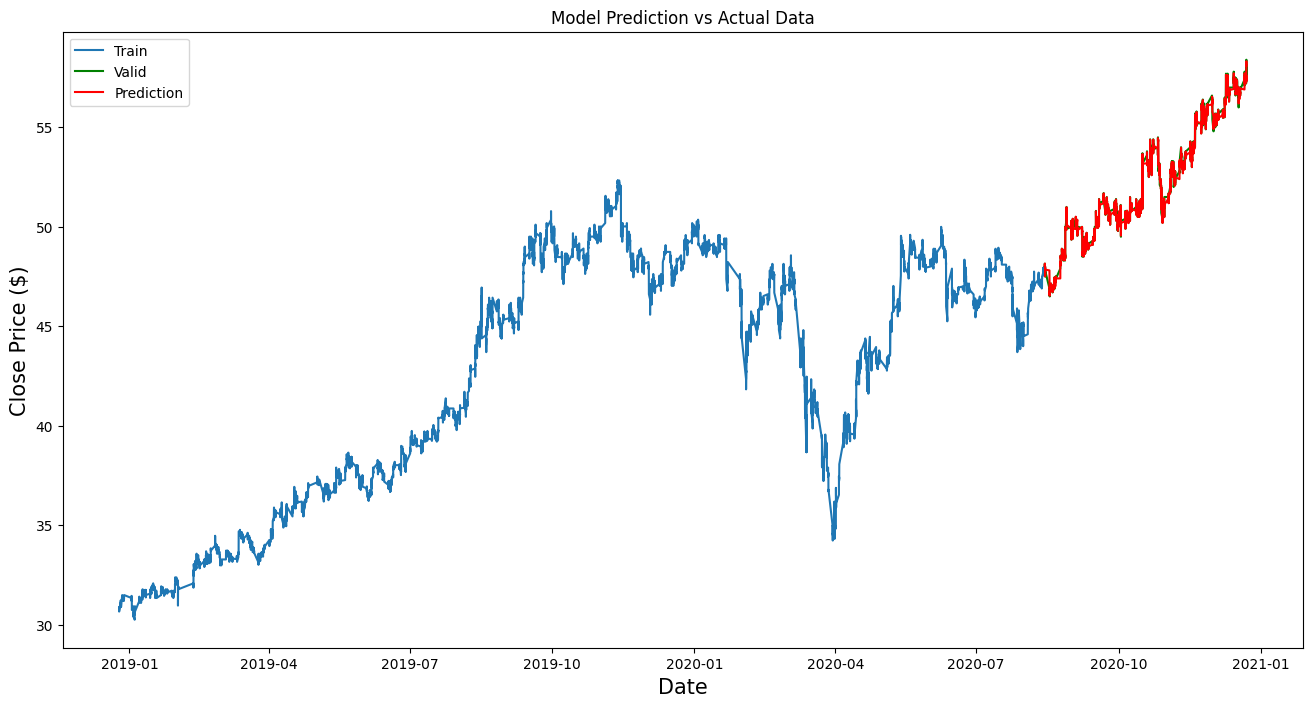

In [ ]:
# FPT
plot(data1, training_data_len_1, prediction1)

<ipython-input-21-44079bb9cebf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = prediction


                     Close  Prediction
Date/Time                             
2020-06-24 13:50:00   58.0   57.926514
2020-06-24 13:52:00   58.0   57.906281
2020-06-24 13:53:00   57.9   57.903976
2020-06-24 13:54:00   57.9   57.827122
2020-06-24 13:55:00   58.0   57.806572
...                    ...         ...
2020-12-22 14:23:00   82.8   82.660110
2020-12-22 14:24:00   82.8   82.664886
2020-12-22 14:25:00   82.8   82.665779
2020-12-22 14:27:00   82.8   82.665947
2020-12-22 14:46:00   82.8   82.666000

[27070 rows x 2 columns]


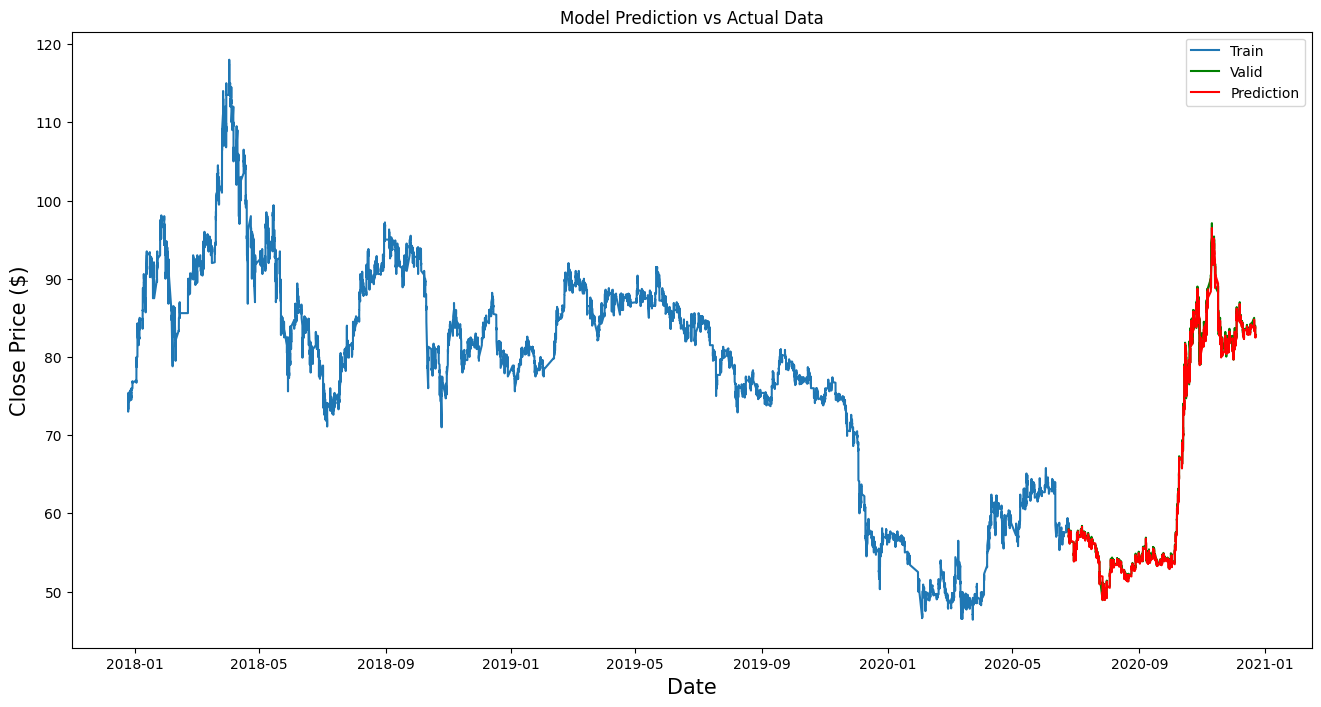

In [22]:
# MSN
plot(data2, training_data_len_2, prediction2)

In [ ]:
# PNJ
plot(data3, training_data_len_3, prediction3)

In [ ]:
# VIC
plot(data4, training_data_len_4, prediction4)

In [ ]:
# Price change
# Price change = Price after 1 hour - current price

In [24]:
def price_change(df):
    df["Price Change"] = df["Close"].shift(-1) - df["Close"]    # After 1
    print(df)

In [ ]:
price_change(df1)

                    Ticker   Open   High    Low  Close  Volume  Open Interest  \
Date/Time                                                                       
2018-12-25 09:15:00    FPT  30.89  30.89  30.89  30.89   35410              0   
2018-12-25 09:16:00    FPT  30.81  30.81  30.81  30.81     190              0   
2018-12-25 09:17:00    FPT  30.74  30.81  30.74  30.74    1120              0   
2018-12-25 09:18:00    FPT  30.74  30.74  30.74  30.74    2120              0   
2018-12-25 09:19:00    FPT  30.74  30.74  30.74  30.74   22500              0   
...                    ...    ...    ...    ...    ...     ...            ...   
2020-12-22 14:24:00    FPT  58.20  58.20  58.20  58.20   27470              0   
2020-12-22 14:25:00    FPT  58.20  58.20  58.20  58.20   14820              0   
2020-12-22 14:26:00    FPT  58.20  58.20  58.20  58.20     500              0   
2020-12-22 14:29:00    FPT  58.10  58.10  58.10  58.10    2500              0   
2020-12-22 14:46:00    FPT  

In [25]:
price_change(df2)

                    Ticker  Open  High   Low  Close  Volume  Open Interest  \
Date/Time                                                                    
2017-12-25 09:15:00    MSN  73.1  73.1  73.1   73.1    4210              0   
2017-12-25 09:16:00    MSN  73.0  73.0  73.0   73.0    5000              0   
2017-12-25 09:18:00    MSN  73.5  73.5  73.5   73.5     210              0   
2017-12-25 09:20:00    MSN  73.2  73.5  73.1   73.1    2050              0   
2017-12-25 09:21:00    MSN  73.0  73.0  73.0   73.0    1380              0   
...                    ...   ...   ...   ...    ...     ...            ...   
2020-12-22 14:23:00    MSN  82.8  82.8  82.8   82.8     700              0   
2020-12-22 14:24:00    MSN  82.7  82.8  82.7   82.8    4660              0   
2020-12-22 14:25:00    MSN  82.8  82.8  82.8   82.8      50              0   
2020-12-22 14:27:00    MSN  82.8  82.8  82.8   82.8     300              0   
2020-12-22 14:46:00    MSN  82.8  82.8  82.8   82.8     200     

In [ ]:
price_change(df2)

In [ ]:
price_change(df2)